# Standardized Qualitative Analysis of Dynamics (SQUAD) R package

During the definition of a regulatory network model it is frequently convenient to start with simple formalisms
and then to transit to more refined models. Continuous interpolations of Boolean Regulatory Networks are defined 
so as to preserve dynamical characteristics of discrete model but extending the range of values of the variables.
In this tutorial we presented the main features of the SQUAD R package to simulate continuous interpolations of 
BRN models.

SQUAD package is a useful tool to define, setting up and running simulations using continuous interpolations of 
regulatory network models. It also can perform stationary states search. 

## 1. Overview of SQUAD R package

The next figure shows schematically the main features of the SQUAD R package. SQUAD extends the functionallity of 
the BoolNet R package. BoolNet has integrated a optimized method to find synchronous stable states by using the
Dubrova algorithm. By the other hand, in an asynchronous context SQUAD performs an optimized heuristic method using BDD representations and model checking. So, the modeller can start defining a discrete BRN model and choose 
synchronous or asynchronous efficient methods for stationary states search. And then, can transit to more refined
continuous methods.

<img src="SQUAD.gif">

SQUAD can be used without prior definition of a Boolean model. Its main methods are: 
* squad() sets up initial states and parameters, along with running simulations.
* getAttractorsSQUAD() calculates stationary states of the model. 

## 2. Instaling SQUAD

Prior to use the SQUAD R package please install the following packages.

* deSolve
* RColorBrewer
* ggthemes
* ggplot2
* BoolNet
* reshape

Some of these packages may require the instalation of devtools and XML libraries. To instal the SQUAD R package please run the following command inside R.

In [46]:
# temporary loading from github
source("https://raw.githubusercontent.com/caramirezal/SQUAD/master/SQUAD.R")

## 3. Defining and running a simulation using SQUAD formalism

# 3.1. Definition of the regulatory network using SQUAD format

In order to define a regulatory network model using SQUAD method it is necessary to define an ODE system as that 
defined in <a href="http://doi.org/10.1016/j.biosystems.2013.05.007"> Martínez, et 2013 </a>. The stardardized ODE functions requires a set of $\omega$ parameter functions for each node. This set of $\omega$ inputs can be defined using the following SQUAD format written in a independent text file. In this example, the file is named 
"regulatoryNetwork.txt". This file has a header which contains the "targets; factors" string which indicates it 
is a SQUAD format file to the R package. 

The already defined file is analogous to the <a href="https://academic.oup.com/bioinformatics/article/26/10/1378/193238/BoolNet-an-R-package-for-generation-reconstruction">BoolNet R Package</a> format. If you are familiar with BoolNet you most notice that commas are changed by semicolons. 

The file is then transformed to squad model by using the loadNetworkSQUAD() function.

In [47]:
net <- loadNetworkSQUAD("regulatoryNetwork.txt")

Once the network is loaded we can set up initial conditions and paramters along with running simulations by using the squad() function as follows.

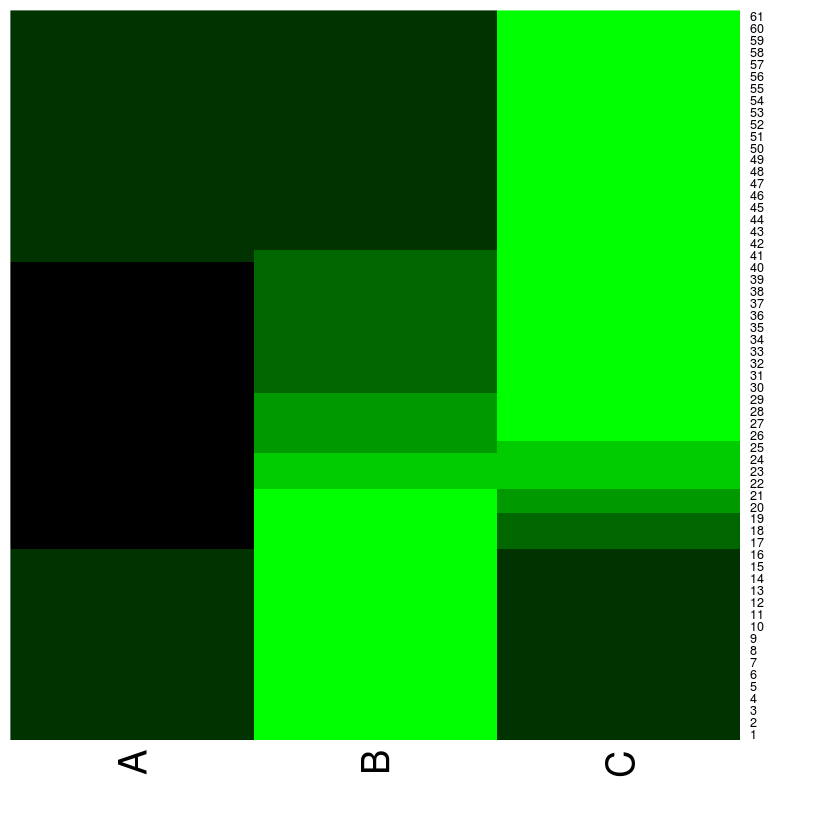

In [48]:
initialState <- c(0,1,0)
#times <- seq(0,10,by=0.5)
h <- c(30,40,50)
gamma <- c(0.8,1,1.2)
parameters <- list(h,gamma)
squad(net, initialState=initialState,parameters=parameters,
     timePeriod=3,lengthInterval=0.05)

From the simulation it can be seen that starting from the initial state $(0,1,0)$ the network transits to $(0,0,1)$ where it remains constant. That is to say, it reaches a stationary state.

## 3.2. Starting with a discrete BRN model

As mentioned aboved, BRN are parameters free simple models which emphasizes in the study of the dynamics driven
by the combinatory of values of the regulators that determines the levels of activations of the nodes in the
network. In practice, it is usually convenient to start with such a simple approach and then transit to more 
complex formalism if needed. SQUAD method can be used in combination with BoolNet to acomplish this task
as follows.

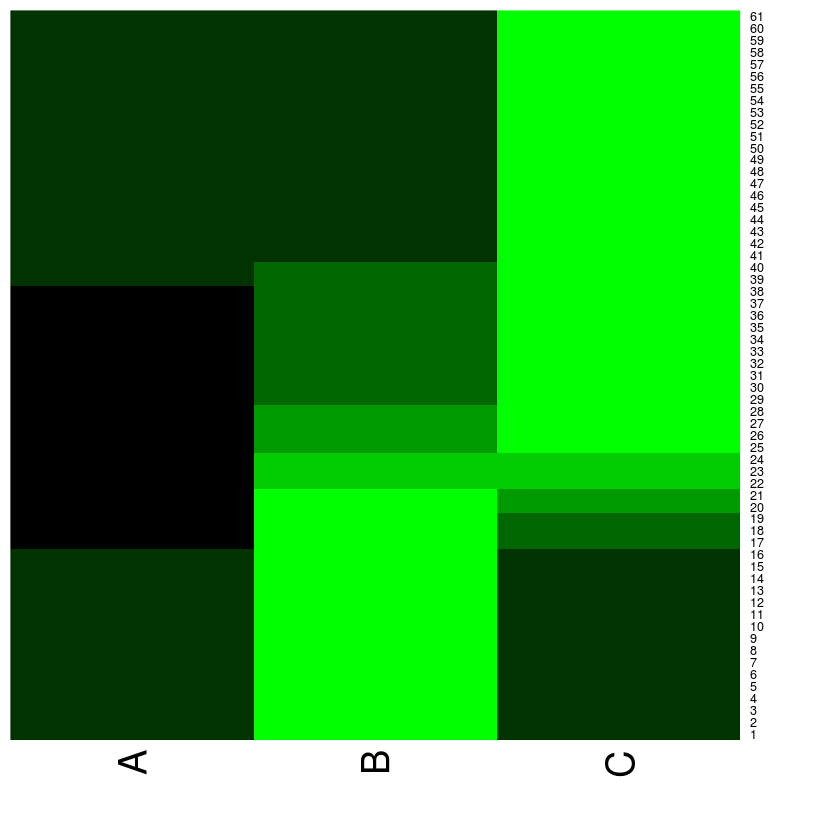

In [52]:
library(BoolNet)

net.bool <- loadNetwork("booleanModel.txt")
net.squad <- asContinuous(net.bool)

squad(net.squad,initialState = c(0,1,0),timePeriod = 3,lengthInterval = 0.05)

In this case we use the same initial states as before. Note that we can see the same transition are observed. In this case we used $gamma = 1$ and $h = 50$ as default values.
